In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('VIXCLS.csv')

In [38]:
df.head()

,observation_date,VIXCLS
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26


In [39]:
df.shape

(9310, 2)

In [40]:
df.isnull().sum()

observation_date      0
VIXCLS              299
dtype: int64

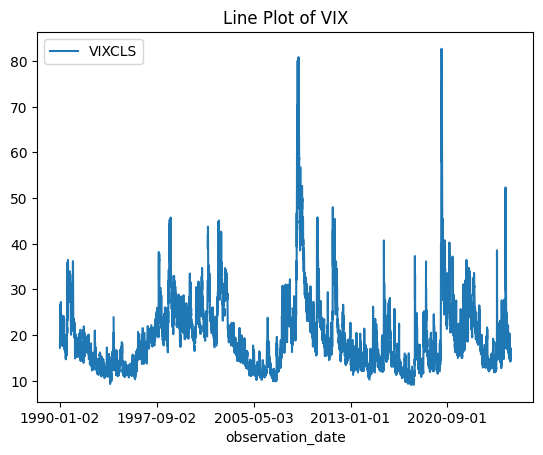

In [41]:
df.plot(x='observation_date', y='VIXCLS', title='Line Plot of VIX')
plt.show()

In [42]:
df.dtypes

observation_date     object
VIXCLS              float64
dtype: object

In [43]:
min(df['VIXCLS'])
max(df['VIXCLS'])


82.69

In [44]:
df["date"] = pd.to_datetime(df["observation_date"])
df

,observation_date,VIXCLS,date
0,1990-01-02,17.24,1990-01-02
1,1990-01-03,18.19,1990-01-03
2,1990-01-04,19.22,1990-01-04
3,1990-01-05,20.11,1990-01-05
4,1990-01-08,20.26,1990-01-08
...,...,...,...
9305,2025-09-02,17.17,2025-09-02
9306,2025-09-03,16.35,2025-09-03
9307,2025-09-04,15.30,2025-09-04
9308,2025-09-05,15.18,2025-09-05


C:\Users\deepi\AppData\Local\Temp\ipykernel_36784\2098546848.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg_vix = df["VIXCLS"].resample("Q").mean()


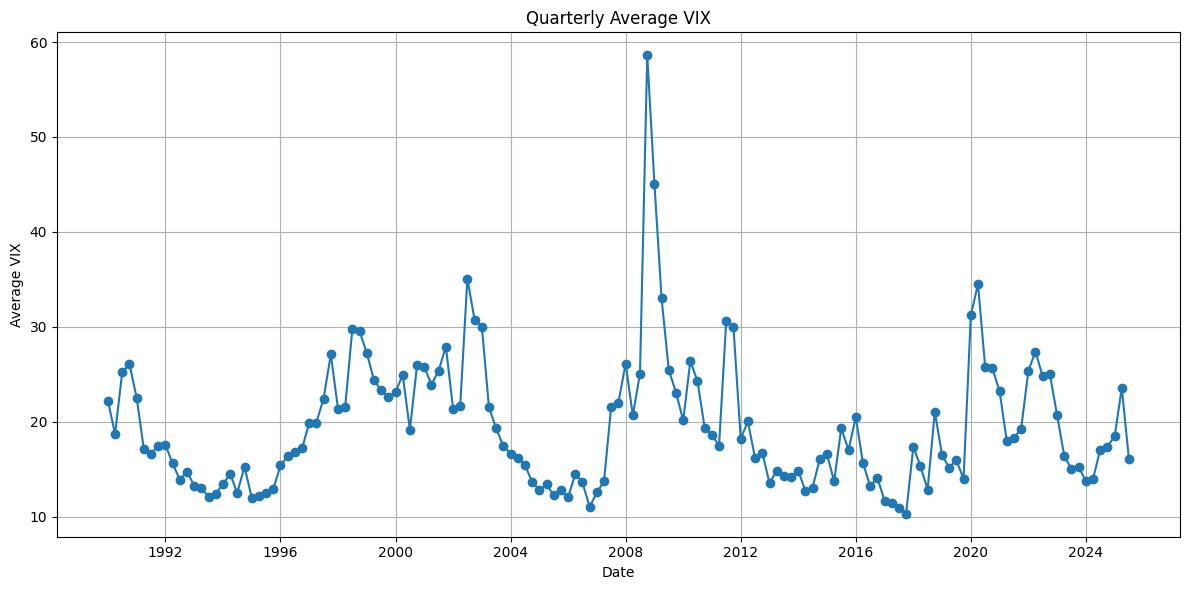

In [ ]:
df.set_index("date", inplace=True)

quarterly_avg_vix = df["VIXCLS"].resample("Q").mean()
quarterly_avg_vix.index = quarterly_avg_vix.index.to_period("Q")

all_quarters_df = quarterly_avg_vix.reset_index()
all_quarters_df.columns = ['quarter', 'average_vix']

plt.figure(figsize=(12, 6))
plt.plot(quarterly_avg_vix.index.to_timestamp(), quarterly_avg_vix.values, marker='o')
plt.title("Quarterly Average VIX")
plt.xlabel("Date")
plt.ylabel("Average VIX")
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
top_10_quarters = quarterly_avg_vix.sort_values(ascending=False).head(10)
print(top_10_quarters)

date
2008Q4    58.604687
2009Q1    45.000000
2002Q3    35.068438
2020Q2    34.493651
2009Q2    33.015714
2020Q1    31.224516
2002Q4    30.726719
2011Q3    30.583594
2003Q1    30.022623
2011Q4    29.939524
Freq: Q-DEC, Name: VIXCLS, dtype: float64


In [47]:

df_hpi = pd.read_csv('hpi_master.csv')
df_hpi.head()
cities = ["Houston", "Phoenix", "Los Angeles", "Chicago", "New York"]
pattern = "|".join(cities)
filtered_df = df_hpi[df_hpi['place_name'].str.contains(pattern, case=False, na=False)]
filtered_df.head()

houston = filtered_df[filtered_df['place_name'].str.contains("Houston", case=False, na=False)]
la = filtered_df[filtered_df['place_name'].str.contains("Los Angeles", case=False, na=False)]
ny = filtered_df[filtered_df['place_name'].str.contains("New York", case=False, na=False)]
chicago = filtered_df[filtered_df['place_name'].str.contains("Chicago", case=False, na=False)]
phoenix = filtered_df[filtered_df['place_name'].str.contains("Phoenix", case=False, na=False)]

In [48]:
df

,observation_date,VIXCLS
date,,
1990-01-02,1990-01-02,17.24
1990-01-03,1990-01-03,18.19
1990-01-04,1990-01-04,19.22
1990-01-05,1990-01-05,20.11
1990-01-08,1990-01-08,20.26
...,...,...
2025-09-02,2025-09-02,17.17
2025-09-03,2025-09-03,16.35
2025-09-04,2025-09-04,15.30


C:\Users\deepi\AppData\Local\Temp\ipykernel_36784\1608201459.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['date'] = pd.to_datetime(df1['yr'].astype(str) + 'Q' + df1['period'].astype(str))
C:\Users\deepi\AppData\Local\Temp\ipykernel_36784\1608201459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['yr'].astype(str) + 'Q' + df1['period'].astype(str))
C:\Users\deepi\AppData\Local\Temp\ipykernel_36784\1608201459.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-ex

Correlation of VIX with city HPIs:

VIX            1.000000
Houston       -0.011871
Los Angeles   -0.076268
New York       0.007559
Chicago        0.014890
Phoenix       -0.035899
Name: VIX, dtype: float64


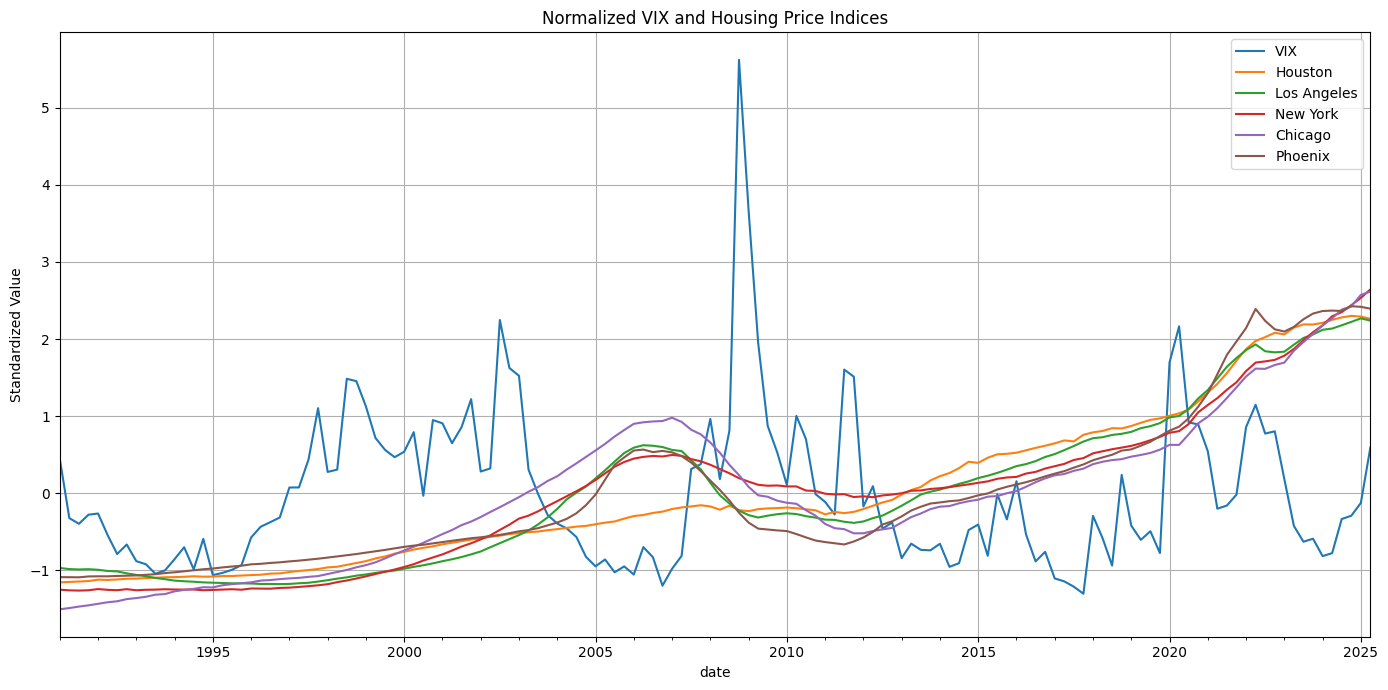

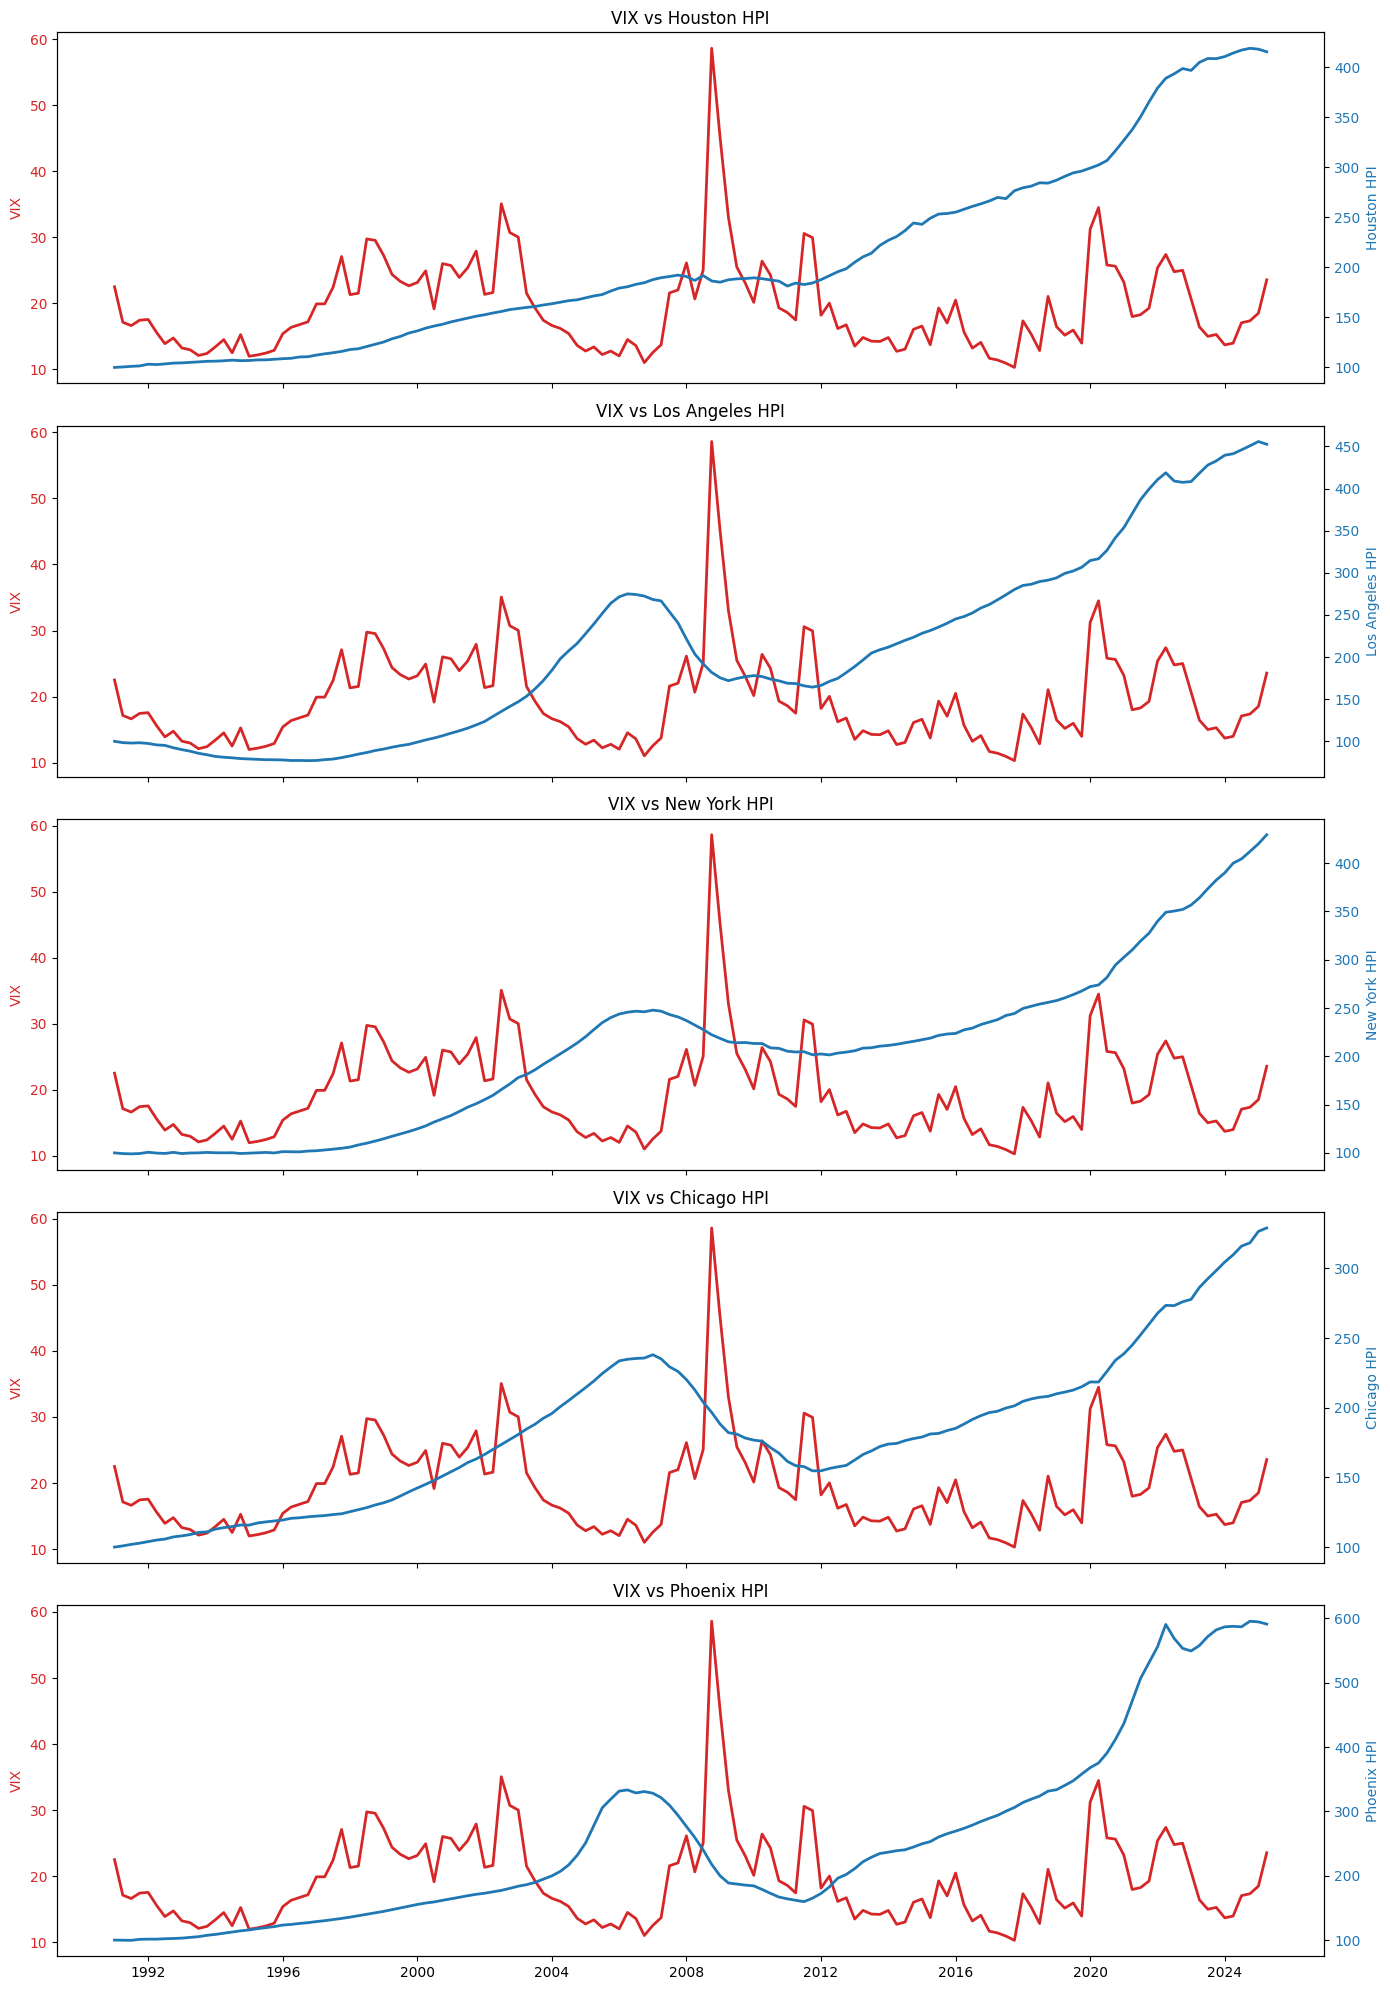

In [ ]:

for df1 in [houston, la, ny, chicago, phoenix]:
    df1['date'] = pd.to_datetime(df1['yr'].astype(str) + 'Q' + df1['period'].astype(str))

houston_q = houston.set_index('date')['index_sa'].resample('Q').mean()
la_q = la.set_index('date')['index_sa'].resample('Q').mean()
ny_q = ny.set_index('date')['index_sa'].resample('Q').mean()
chicago_q = chicago.set_index('date')['index_sa'].resample('Q').mean()
phoenix_q = phoenix.set_index('date')['index_sa'].resample('Q').mean()

for series in [houston_q, la_q, ny_q, chicago_q, phoenix_q]:
    series.index = series.index.to_period('Q')

combined_df = pd.DataFrame({
    'VIX': quarterly_avg_vix,
    'Houston': houston_q,
    'Los Angeles': la_q,
    'New York': ny_q,
    'Chicago': chicago_q,
    'Phoenix': phoenix_q
})

combined_df.dropna(inplace=True)

correlation_matrix = combined_df.corr()
print("Correlation of VIX with city HPIs:\n")
print(correlation_matrix['VIX'])

normalized_df = (combined_df - combined_df.mean()) / combined_df.std()

normalized_df.plot(figsize=(14, 7))
plt.title("Normalized VIX and Housing Price Indices")
plt.ylabel("Standardized Value")
plt.grid(True)
plt.tight_layout()
plt.show()


combined_df_plot = combined_df.copy()
combined_df_plot.index = combined_df_plot.index.to_timestamp()

cities = ['Houston', 'Los Angeles', 'New York', 'Chicago', 'Phoenix']

fig, axes = plt.subplots(len(cities), 1, figsize=(14, 20), sharex=True)

for i, city in enumerate(cities):
    ax1 = axes[i]
    
    ax1.plot(combined_df_plot.index, combined_df_plot['VIX'], color='tab:red', label='VIX', linewidth=2)
    ax1.set_ylabel('VIX', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    
    ax2 = ax1.twinx()
    ax2.plot(combined_df_plot.index, combined_df_plot[city], color='tab:blue', label=f'{city} HPI', linewidth=2)
    ax2.set_ylabel(f'{city} HPI', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    
    ax1.set_title(f'VIX vs {city} HPI')

plt.xlabel('Date')
plt.tight_layout()
plt.show()



